# Install & Import Libraries

In [1]:
pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.4-cp310-cp310-linux_x86_64.whl size=3327193 sha256=b3d2c7a8ec40f8b1d989747ead3bf93066f9489e480a142fced0eff471d23339
  Stored in directory: /root/.cache/pip/wheels/08/5e/55/a7db8d57920eb2c2aa41c36dc4c6d3cd12323865de191a7211
Successfully built dlib
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install requests

^C
ERROR: Operation cancelled by user


In [4]:
import os
import PIL.Image
import dlib
import numpy as np
import requests
import bz2
import shutil

**os: Provides functions for interacting with the operating system, facilitating file and directory operations.**

**PIL.Image: Part of the Python Imaging Library (PIL), it supports image file operations such as opening, manipulating, and saving various image formats.**

**dlib: A powerful C++ toolkit that includes machine learning algorithms and tools, widely used for facial recognition and object detection tasks.**

**numpy: A fundamental library for numerical computing in Python, enabling operations on large arrays and matrices efficiently.**

**requests: Simplifies making HTTP requests in Python, useful for downloading data from web servers.**

**bz2: Handles bzip2-compressed files, providing functionalities for reading and writing these compressed files.**

**wget: A utility for programmatically downloading files from web servers, often used for automating data acquisition tasks.**

**shutil: Offers high-level file operations like copying, moving, and removing files and directories in a platform-independent manner.**


# Script to Download and Extract Models (Face Recognition)

In [5]:
shape_predictor_68_url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
shape_predictor_5_url = "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2"
face_rec_model_url = "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2"

shape_predictor_68_bz2_path = "shape_predictor_68_face_landmarks.dat.bz2"
shape_predictor_68_path = "shape_predictor_68_face_landmarks.dat"
shape_predictor_5_bz2_path = "shape_predictor_5_face_landmarks.dat.bz2"
shape_predictor_5_path = "shape_predictor_5_face_landmarks.dat"
face_rec_model_bz2_path = "dlib_face_recognition_resnet_model_v1.dat.bz2"
face_rec_model_path = "dlib_face_recognition_resnet_model_v1.dat"

def download_file(url, output_path):
    print(f"Downloading {url}...")
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(output_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {output_path}")
    else:
        raise Exception(f"Failed to download {url}")

def extract_bz2(bz2_path, output_path):
    print(f"Extracting {bz2_path}...")
    try:
        with bz2.BZ2File(bz2_path) as fr, open(output_path, 'wb') as fw:
            fw.write(fr.read())
        print(f"Extracted {output_path}")
    except Exception as e:
        raise Exception(f"Error extracting {bz2_path}: {e}")

def verify_file(path, expected_size=None):
    if os.path.isfile(path) and os.path.getsize(path) > 0:
        if expected_size and os.path.getsize(path) != expected_size:
            print(f"Warning: {path} size mismatch (expected {expected_size}, got {os.path.getsize(path)})")
        return True
    return False

expected_size_68 = 9974504  
expected_size_5 = 6452366  
expected_size_model = 244918992 

if os.path.exists(shape_predictor_68_bz2_path):
    os.remove(shape_predictor_68_bz2_path)
if os.path.exists(shape_predictor_5_bz2_path):
    os.remove(shape_predictor_5_bz2_path)
if os.path.exists(face_rec_model_bz2_path):
    os.remove(face_rec_model_bz2_path)

if not verify_file(shape_predictor_68_bz2_path, expected_size_68):
    download_file(shape_predictor_68_url, shape_predictor_68_bz2_path)
    if not verify_file(shape_predictor_68_bz2_path, expected_size_68):
        raise Exception("Failed to download a valid shape_predictor_68_face_landmarks.dat.bz2 file")

extract_bz2(shape_predictor_68_bz2_path, shape_predictor_68_path)

if not verify_file(shape_predictor_5_bz2_path, expected_size_5):
    download_file(shape_predictor_5_url, shape_predictor_5_bz2_path)
    if not verify_file(shape_predictor_5_bz2_path, expected_size_5):
        raise Exception("Failed to download a valid shape_predictor_5_face_landmarks.dat.bz2 file")

extract_bz2(shape_predictor_5_bz2_path, shape_predictor_5_path)

if not verify_file(face_rec_model_bz2_path, expected_size_model):
    download_file(face_rec_model_url, face_rec_model_bz2_path)
    if not verify_file(face_rec_model_bz2_path, expected_size_model):
        raise Exception("Failed to download a valid dlib_face_recognition_resnet_model_v1.dat.bz2 file")

extract_bz2(face_rec_model_bz2_path, face_rec_model_path)

if not verify_file(shape_predictor_68_path):
    raise FileNotFoundError(f"Failed to verify file: {shape_predictor_68_path}")

if not verify_file(shape_predictor_5_path):
    raise FileNotFoundError(f"Failed to verify file: {shape_predictor_5_path}")

if not verify_file(face_rec_model_path):
    raise FileNotFoundError(f"Failed to verify file: {face_rec_model_path}")

detector = dlib.get_frontal_face_detector()
shape_predictor_68_point = dlib.shape_predictor(shape_predictor_68_path)
shape_predictor_5_point = dlib.shape_predictor(shape_predictor_5_path)
face_encoder = dlib.face_recognition_model_v1(face_rec_model_path)

Downloaded shape_predictor_68_face_landmarks.dat.bz2
Extracting shape_predictor_68_face_landmarks.dat.bz2...
Extracted shape_predictor_68_face_landmarks.dat
Downloaded shape_predictor_5_face_landmarks.dat.bz2
Extracting shape_predictor_5_face_landmarks.dat.bz2...
Extracted shape_predictor_5_face_landmarks.dat
Downloaded dlib_face_recognition_resnet_model_v1.dat.bz2
Extracting dlib_face_recognition_resnet_model_v1.dat.bz2...
Extracted dlib_face_recognition_resnet_model_v1.dat


**This cell initializes the notebook environment by importing essential Python libraries and defining necessary variables and functions. The libraries imported include os for operating system interactions, PIL.Image for image processing, dlib for facial recognition and detection tasks, numpy for numerical operations, requests for downloading files via HTTP, bz2 for handling bzip2-compressed files, wget for automated file downloads, and shutil for high-level file operations. These libraries collectively support various tasks such as image manipulation, data acquisition, and file management crucial for facial recognition workflows.**

**The cell also defines URLs for downloading pre-trained models and their corresponding local paths where they will be stored after download and extraction. Functions like download_file, extract_bz2, and verify_file are provided to facilitate these operations. These functions ensure that the shape predictor models (shape_predictor_68_face_landmarks.dat, shape_predictor_5_face_landmarks.dat) and the face recognition model (dlib_face_recognition_resnet_model_v1.dat) are downloaded, extracted from their bz2-compressed formats, and verified against expected file sizes. After verifying the presence and integrity of these files, instances of dlib components are initialized: a frontal face detector (detector), shape predictors for 68 and 5 face landmarks (shape_predictor_68_point, shape_predictor_5_point), and a face recognition model (face_encoder). These components are essential for subsequent facial recognition tasks within the** notebook environment.

# Function to Load an Image File in RGB Mode

In [6]:
def load_image_file(file, mode='RGB'):
    im = PIL.Image.open(file)
    if mode:
        im = im.convert(mode)
    return np.array(im)

**The function is versatile, allowing the loading of images in various formats (e.g., JPEG, PNG) and converting them into a format suitable for further processing using libraries like NumPy or dlib. Adjusting the mode parameter enables handling of different color spaces or grayscale images, ensuring flexibility depending on the application's needs. This function is foundational for preprocessing images before feeding them into facial recognition or other image-based tasks within your notebook or application.**

# Function to Detect Raw Face Locations

In [7]:
def _raw_face_locations(img, number_of_times_to_upsample=1, model="hog"):
    if model == "cnn":
        return detector(img, number_of_times_to_upsample)
    else:
        return detector(img, number_of_times_to_upsample)

**This function encapsulates the logic for face detection using dlib's face detector, offering flexibility to choose between two detection models ("hog" or "cnn"). The function is crucial in preprocessing images for subsequent tasks such as facial recognition or face alignment, ensuring that face regions are accurately identified regardless of the chosen detection model. Adjusting the number_of_times_to_upsample parameter can improve detection accuracy at the cost of increased computation time, depending on the size and quality of the input image.**

# Function to Extract Raw Face Landmarks


In [8]:
def _raw_face_landmarks(face_image, face_locations=None, model="large"):
    if face_locations is None:
        face_locations = _raw_face_locations(face_image)
    else:
        face_locations = [dlib.rectangle(*face_loc) for face_loc in face_locations]

    if model == "small":
        pose_predictor = shape_predictor_5_point
    else:
        pose_predictor = shape_predictor_68_point

    return [pose_predictor(face_image, face_loc) for face_loc in face_locations]

**The function abstracts the process of detecting facial landmarks based on the chosen model ("small" for 5 landmarks or "large" for 68 landmarks).
It ensures flexibility by allowing either internally detected face locations or externally provided face locations.
Facial landmark detection is crucial for tasks such as face alignment, emotion recognition, and facial feature analysis, making this function essential in preparing face data for subsequent machine learning or computer vision tasks. Adjusting the model parameter allows adaptation to specific use cases that require either more detailed (68 landmarks) or faster (5 landmarks) landmark detection.**

# Function to Compute Face Encodings

In [9]:

def face_encodings(face_image, known_face_locations=None, num_jitters=1, model="small"):
    raw_landmarks = _raw_face_landmarks(face_image, known_face_locations, model)
    return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]


**Purpose: The function abstracts the process of extracting face encodings from an input image, facilitating tasks such as face recognition or verification.**

**Flexibility: By allowing specification of face locations (known_face_locations), jittering (num_jitters), and landmark model (model), it accommodates different use cases and performance needs.**

**Output: The function outputs a list of numeric encodings (vectors) that represent the unique features of each detected face, suitable for comparison or further processing in machine learning models.**

# Function to Compare Face Encodings

In [10]:
def compare_faces(known_encodings, candidate_encoding, tolerance=0.6):
    return [np.linalg.norm(known_encoding - candidate_encoding) <= tolerance for known_encoding in known_encodings]

**Purpose: The function facilitates the comparison of a candidate face encoding against multiple known face encodings to determine potential matches.**

**Flexibility: Allows customization of the tolerance level (tolerance) for matching criteria, enabling adjustment based on application-specific requirements.**

**Output: Returns a list of boolean values, where True indicates a match within the specified tolerance, and False indicates no match.**

**Performance: Utilizes vectorized operations (np.linalg.norm()) to efficiently compute distances between face encodings, suitable for processing batches of comparisons.**

# Function to Recognize if Two Images are of the Same Person

In [11]:
def recognize(img1, img2):
    encodings_img1 = face_encodings(img1)
    if len(encodings_img1) == 0:
        return False

    encodings_img2 = face_encodings(img2)
    if len(encodings_img2) == 0:
        return False

    match = compare_faces([encodings_img1[0]], encodings_img2[0])[0]

    return match


img1 = load_image_file("/kaggle/input/eloonmm/DA/th (2).jpeg")
img2 = load_image_file("/kaggle/input/eloonmm/DA/th (1).jpeg")


result = recognize(img1, img2)
print("Face recognition result:", result)

Face recognition result: True


# Function to Visualize Facial Keypoints

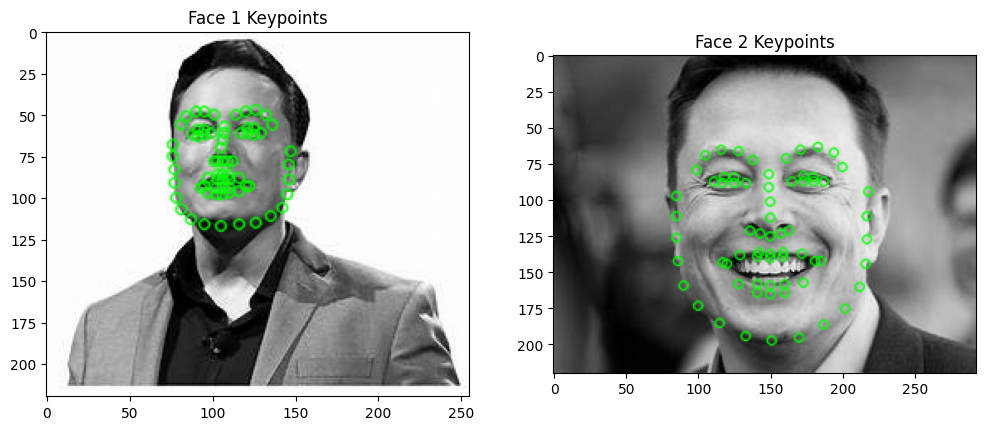

In [12]:

import cv2
import matplotlib.pyplot as plt 
def visualize_keypoints(img1, img2):
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    faces_img1 = detector(gray_img1)
    faces_img2 = detector(gray_img2)

    if len(faces_img1) == 0 or len(faces_img2) == 0:
        print("No faces found in one or both images.")
        return

    landmarks_img1 = shape_predictor_68_point(gray_img1, faces_img1[0])
    landmarks_img2 = shape_predictor_68_point(gray_img2, faces_img2[0])

    keypoints1 = []
    for n in range(0, 68):
        x = landmarks_img1.part(n).x
        y = landmarks_img1.part(n).y
        keypoints1.append(cv2.KeyPoint(x, y, 1))

    keypoints2 = []
    for n in range(0, 68):
        x = landmarks_img2.part(n).x
        y = landmarks_img2.part(n).y
        keypoints2.append(cv2.KeyPoint(x, y, 1))

    img1_with_keypoints = cv2.drawKeypoints(gray_img1, keypoints1, None, color=(0, 255, 0))
    img2_with_keypoints = cv2.drawKeypoints(gray_img2, keypoints2, None, color=(0, 255, 0))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img1_with_keypoints, cmap='gray')
    plt.title('Face 1 Keypoints')

    plt.subplot(1, 2, 2)
    plt.imshow(img2_with_keypoints, cmap='gray')
    plt.title('Face 2 Keypoints')

    plt.show()

# Convert images to BGR format for OpenCV
img1_bgr = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2_bgr = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

visualize_keypoints(img1_bgr, img2_bgr)